In [3]:
# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

import numpy as np

# import plotting tools
from matplotlib import pyplot as plt

from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image

disp = Display(visible=0, size=(1366,768))
disp.start()

In [19]:
# start AUTO with runner object
runner = ra.runAUTO()

print("\n***Generate starting data***")
r1 = ac.run(e='clusters', c='clusters', runner=runner)
r2 = ac.run(r1, c='clusters.1', runner=runner)


***Generate starting data***
Starting clusters ...

  BR    PT  TY  LAB    PAR(8)        L2-NORM         U(1)          U(2)          U(3)          U(4)          U(5)          U(6)     
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1     5  EP    2   1.60000E-01   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00

 Total Time    0.416E-01
clusters ... done
Starting clusters ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)          U(4)          U(5)          U(6)     
   1     1  EP    1   2.50000E-01   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


   1   283  BP    2   5.32343E-01   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1   500        3   7.49343E-01   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  1000        4   1.24934E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  1348  BP    5   1.59734E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  1349  HB    6   1.59834E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  1500        7   1.74934E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  2000        8   2.24934E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1  2500        9   2.74934E+00   0.00000E+00   0.00000E+00   0.00000E+00 

   3  1817  HB   61   3.05750E+00   7.06136E-01  -2.58490E-02  -2.58490E-02  -2.58490E-02  -2.58490E-02  -2.58490E-02  -2.58490E-02
   3  2000       62   3.23999E+00   7.12945E-01  -2.61976E-02  -2.61976E-02  -2.61976E-02  -2.61976E-02  -2.61976E-02  -2.61976E-02
   3  2500       63   3.73921E+00   7.23963E-01  -2.61100E-02  -2.61100E-02  -2.61100E-02  -2.61100E-02  -2.61100E-02  -2.61100E-02
   3  2762  UZ   64   4.00000E+00   7.27110E-01  -2.57164E-02  -2.57164E-02  -2.57164E-02  -2.57164E-02  -2.57164E-02  -2.57164E-02

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)          U(4)          U(5)          U(6)     
   4   500       65   2.20789E+00   6.16335E+00   5.75834E-01   5.75834E-01   5.75834E-01   5.75834E-01   5.75834E-01   5.75834E-01
   4  1000       66   2.64506E+00   6.33675E+00   5.48841E-01   5.48841E-01   5.48841E-01   5.48841E-01   5.48841E-01   5.48841E-01
   4  1500       67   3.10919E+00   6.46714E+00   5.24240E-01   5.24240E-0

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


In [20]:
r2 = ac.relabel(r2)

Relabeling done


In [21]:
# load saved AUTO data
bd = ac.loadbd()
NDim = bd[0].c['NDIM']

# these are the types and labels for algebraic problems
# "user output point" is type number -4, so this works for that
AUTOtypes = ["","BP","LP","HB","","","UZ","","","EP"]
AUTOlabels = ["","branch point","fold","Hopf bifurcation","regular output point","","user output point","",
                  "", "end point"]

# branches of the solution
branches = [ 
         {  "par"        : br.coordarray[0,:], 
            "L2norm"     : br.coordarray[1,:],
            "branchnum"  : br.BR,
            "parS"       : np.array( [ bd(id).PAR(1) for id in br.getLabels() ] ),
            "xS"         : np.array( [ bd(id)[0]['u'] for id in br.getLabels() ] ),
            "PT"         : np.array( [ br[ bd(id)['PT']-1 ]['PT'] for id in br.getLabels() ]  )
         } for br in bd ]
# individual solutions
sols = [ {  "u"         : np.array( s[0]['u'] ),
            "par"       : s.PAR,
            "branchnum" : s.data['BR'],
            "typenum"   : s.data['TY number'],
            "type"      : AUTOtypes[ s.data['TY number'] ],
            "typename"  : AUTOlabels[ s.data['TY number'] ]
         } for s in bd() ]

# bifurcation points
HB = [ s for s in sols if s["type"] == "HB" ]
BP = [ s for s in sols if s["type"] == "BP" ]

Parsed output data


In [22]:
# stable portions
stablebranches = [ [] for b in branches ]
for i, b in enumerate(branches):
    indices = np.array( [j for j, p in enumerate(b['PT']) if p < 0] )
    if len(indices) > 0:
        stablebranches[i] = {
            "parS" : b['parS'][indices],
            "xS"   : b['xS'][indices],
            "PT"   : b['PT'][indices]
        }

(0.0, 4.0)

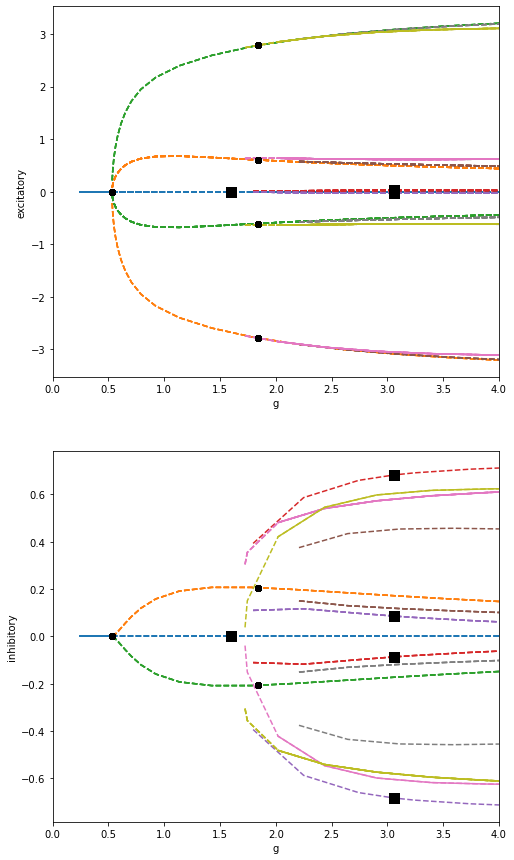

In [23]:
plt.figure(figsize=(8, 15))
fontsize=18

ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
frac = 0.8
Nc = 4
exsplit = 16

# Hopf bifurcations and branch points
xHB = np.array( [ s['par']['PAR(1)'] for s in HB ] )
yHB = np.array( [ s['u'] for s in HB ] )
xBP = np.array( [ s['par']['PAR(1)'] for s in BP ] )
yBP = np.array( [ s['u'] for s in BP ] )

for index, branch in enumerate(branches):
#     bcolor = 'C'+str( branch["branchnum"] - 1 )
    bcolor = 'C'+str(index)
    ax1.plot( branch['parS'], branch['xS'][:,:exsplit], '--', c=bcolor)
    ax2.plot( branch['parS'], branch['xS'][:,exsplit:], '--', c=bcolor)
    if stablebranches[index] != []:
        ax1.plot( stablebranches[index]['parS'], stablebranches[index]['xS'][:,:exsplit], '-', c=bcolor)
        ax2.plot( stablebranches[index]['parS'], stablebranches[index]['xS'][:,exsplit:], '-', c=bcolor)
#     ax2.plot( branch['parS'], branch['xS'][:,exsplit], c=bcolor)
    if len(xHB) > 0:
        ax1.plot( xHB, yHB[:,:exsplit], 'sk', markersize=10 )
        ax2.plot( xHB, yHB[:,exsplit:], 'sk', markersize=10 )
    if len(xBP) > 0:
        ax1.plot( xBP, yBP[:,:exsplit], 'ok')
        ax2.plot( xBP, yBP[:,exsplit:], 'ok')
    
ax1.set_xlabel('g')
ax1.set_ylabel('excitatory')
ax1.set_xlim(0,4)
ax2.set_xlabel('g')
ax2.set_ylabel('inhibitory')
ax2.set_xlim(0,4)


# legendlabels = ['0 solution','3-1 inh','3-1 inh']
# lines = [ mpl.lines.Line2D([0,1],[0,1], linestyle='--', color='C'+str(i) ) for i, lab in enumerate(legendlabels) ]
# ax1.legend(lines, legendlabels)
# ax2.legend(lines, legendlabels)


